# 6.2 Exploring Relationships

## Contents:

1. Import Libraries
2. Import Datasets
3. Exploratory Analysis for df_cra
4. Exploratory Analysis for df_uni
5. Exploratory Analysis for merged_df
6. Scatterplots
7. Pair Plot
8. Categorical Plot

## 1. Import Libraries

In [79]:
# import visualisation libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 2. Import Datasets

In [81]:
# import cleaned datasets

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Data Immersion/A6, Advanced Analythics & Dashboard Design/Achievement 6/09-2024 SA Road Crash Analysis'
df_cra = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_crash_clean.csv'))
df_uni = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_units_clean.csv'))

## 3. Exploratory Analysis for df_cra

In [83]:
# get columns in df_cra

df_cra.columns

Index(['Unnamed: 0', 'REPORT_ID', 'crash_stats_area', 'crash_suburb',
       'crash_postcode', 'crash_lga_name', 'total_units', 'total_casualties',
       'total_fatalities', 'total_serious_injuries', 'total_minor_injuries',
       'crash_year', 'crash_month', 'crash_day', 'crash_time', 'area_speed',
       'crash_position_type', 'crash_horizontal_align', 'crash_vertical_align',
       'crash_other_features', 'road_surface', 'moisture_conditions',
       'weather_conditions', 'crash_time_of_day', 'crash_type',
       'unit_responsible', 'entity_code', 'csef_severity', 'traffic_controls',
       'dui_involved', 'drugs_involved', 'accloc_x', 'accloc_y', 'unique_loc',
       'crash_date_time'],
      dtype='object')

In [84]:
# drop Unnamed: 0 column

df_cra.drop(columns='Unnamed: 0', inplace=True)

In [85]:
# check data types

df_cra.dtypes

REPORT_ID                  object
crash_stats_area           object
crash_suburb               object
crash_postcode              int64
crash_lga_name             object
total_units                 int64
total_casualties            int64
total_fatalities            int64
total_serious_injuries      int64
total_minor_injuries        int64
crash_year                  int64
crash_month                object
crash_day                  object
crash_time                 object
area_speed                  int64
crash_position_type        object
crash_horizontal_align     object
crash_vertical_align       object
crash_other_features       object
road_surface               object
moisture_conditions        object
weather_conditions         object
crash_time_of_day          object
crash_type                 object
unit_responsible            int64
entity_code                object
csef_severity              object
traffic_controls           object
dui_involved               object
drugs_involved

In [86]:
# create subset excluding the categorical columns

sub_cra = df_cra[['REPORT_ID', 'crash_postcode', 'total_units', 'total_casualties', 'total_fatalities', 'total_serious_injuries', 'total_minor_injuries', 'crash_year', 'area_speed', 'accloc_x', 'accloc_y', 'unique_loc']]

In [87]:
# exclude the 'REPORT_ID' column
sub_cra_without_keys = sub_cra.drop('REPORT_ID', axis=1)

# calculate the correlation matrix
sub_cra_without_keys.corr()

,crash_postcode,total_units,total_casualties,total_fatalities,total_serious_injuries,total_minor_injuries,crash_year,area_speed,accloc_x,accloc_y,unique_loc
crash_postcode,1.000000,-0.105570,0.053624,0.064272,0.078856,0.014299,0.015272,0.344460,-0.011498,0.108686,-0.011771
total_units,-0.105570,1.000000,0.034806,0.002026,-0.034151,0.052754,0.003024,-0.070050,0.029023,-0.069001,0.029670
total_casualties,0.053624,0.034806,1.000000,0.153210,0.387091,0.900051,-0.063098,0.105103,-0.003371,0.021361,-0.003589
total_fatalities,0.064272,0.002026,0.153210,1.000000,0.086697,-0.021043,-0.002859,0.094632,-0.010640,0.029002,-0.010710
total_serious_injuries,0.078856,-0.034151,0.387091,0.086697,1.000000,-0.029332,-0.005849,0.114040,-0.008459,0.035353,-0.008569
total_minor_injuries,0.014299,0.052754,0.900051,-0.021043,-0.029332,1.000000,-0.065979,0.050548,0.001633,0.003453,0.001454
crash_year,0.015272,0.003024,-0.063098,-0.002859,-0.005849,-0.065979,1.000000,0.008601,-0.005497,0.004258,-0.006013
area_speed,0.344460,-0.070050,0.105103,0.094632,0.114040,0.050548,0.008601,1.000000,-0.006959,0.118426,-0.006454
accloc_x,-0.011498,0.029023,-0.003371,-0.010640,-0.008459,0.001633,-0.005497,-0.006959,1.000000,-0.510774,0.996172
accloc_y,0.108686,-0.069001,0.021361,0.029002,0.035353,0.003453,0.004258,0.118426,-0.510774,1.000000,-0.519908


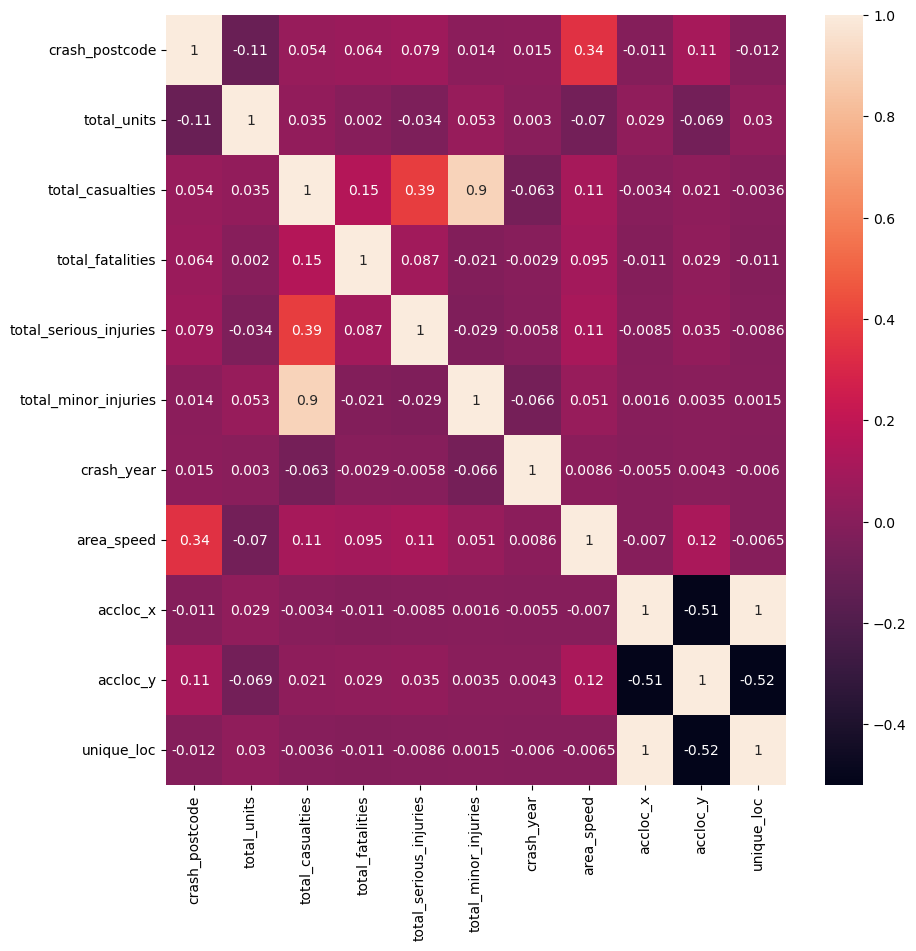

In [88]:
# create subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# create correlation heatmap in seaborn

corr = sns.heatmap(sub_cra_without_keys.corr(), annot = True, ax = ax)

## 4. Exploratory Analysis for df_uni

In [90]:
# get columns in df_uni

df_uni.columns

Index(['Unnamed: 0', 'REPORT_ID', 'UNIT_NUMBER', 'unit_number_of_casualties',
       'unit_registration_state', 'unit_type', 'unit_registration_year',
       'direction_of_travel', 'unit_controller_sex', 'unit_controller_age',
       'unit_controller_licence_state', 'unit_controller_licence_class',
       'unit_controller_licence_type', 'towing', 'unit_movement',
       'unit_number_of_occupants', 'unit_controller_residential_postcode',
       'unit_rollover', 'unit_fire'],
      dtype='object')

In [91]:
# drop Unnamed: 0 column

df_uni.drop(columns='Unnamed: 0', inplace=True)

In [92]:
# check data types

df_uni.dtypes

REPORT_ID                                object
UNIT_NUMBER                               int64
unit_number_of_casualties                 int64
unit_registration_state                  object
unit_type                                object
unit_registration_year                   object
direction_of_travel                      object
unit_controller_sex                      object
unit_controller_age                      object
unit_controller_licence_state            object
unit_controller_licence_class            object
unit_controller_licence_type             object
towing                                   object
unit_movement                            object
unit_number_of_occupants                float64
unit_controller_residential_postcode     object
unit_rollover                            object
unit_fire                                object
dtype: object

In [93]:
df_uni.head()

,REPORT_ID,UNIT_NUMBER,unit_number_of_casualties,unit_registration_state,unit_type,unit_registration_year,direction_of_travel,unit_controller_sex,unit_controller_age,unit_controller_licence_state,unit_controller_licence_class,unit_controller_licence_type,towing,unit_movement,unit_number_of_occupants,unit_controller_residential_postcode,unit_rollover,unit_fire
0,2019-1-16/08/2024,1,0,SA,Station Wagon,1998,South,Female,085,SA,C,Full,Not Towing,Right Turn,1.0,Unknown,N,N
1,2019-1-16/08/2024,2,0,SA,Motor Cars - Sedan,2009,East,Female,022,SA,C,Provisional 2,Not Towing,Straight Ahead,1.0,5085,N,N
2,2019-2-16/08/2024,1,0,SA,Motor Cars - Sedan,2007,North East,Male,021,SA,C,Provisional 2,Not Towing,Straight Ahead,4.0,5114,N,N
3,2019-2-16/08/2024,2,0,SA,Motor Cars - Sedan,2002,North East,Female,031,SA,C,Full,Not Towing,Straight Ahead,1.0,5108,N,N
4,2019-3-16/08/2024,1,0,Unknown,Motor Vehicle - Type Unknown,Unknown,East,Unknown,Unknown,Unknown,XX,Unknown,Unknown,Straight Ahead,1.0,Unknown,N,N


In [94]:
# unit_number_of_occupants column: convert it to numeric data type

# create subset without NaN values

df_uni_sub = df_uni[df_uni['unit_number_of_occupants'].notnull()].copy()

# convert float to integer

df_uni_sub['unit_number_of_occupants'] = df_uni_sub['unit_number_of_occupants'].astype(int)

In [95]:
# unit_registration_year column: convert it to numeric data type

# create subset without Not Applicable values

df_uni_sub = df_uni_sub[df_uni_sub['unit_registration_year'] != 'Not Applicable'].copy()

# replace Unknown with NaN

df_uni_sub['unit_registration_year'] = df_uni_sub['unit_registration_year'].replace('Unknown', np.nan)

# convert non-nan values to numeric

df_uni_sub['unit_registration_year'] = pd.to_numeric(df_uni_sub['unit_registration_year'], errors='coerce')

# impute random numbers

df_uni_sub['unit_registration_year'] = df_uni_sub['unit_registration_year'].fillna(np.random.randint(1900, 2023))

# convert float to integer

df_uni_sub['unit_registration_year'] = df_uni_sub['unit_registration_year'].astype(int)

In [96]:
# unit_controller_age column: convert it to numeric data type

# create subset without Not Applicable values

df_uni_sub = df_uni_sub[df_uni_sub['unit_controller_age'] != 'Not Applicable'].copy()

# replace Unknown with NaN

df_uni_sub['unit_controller_age'] = df_uni_sub['unit_controller_age'].replace('Unknown', np.nan)

# convert non-nan values to numeric

df_uni_sub['unit_controller_age'] = pd.to_numeric(df_uni_sub['unit_controller_age'], errors='coerce')

# impute random numbers

df_uni_sub['unit_controller_age'] = df_uni_sub['unit_controller_age'].fillna(np.random.randint(16, 100))

# convert float to integer

df_uni_sub['unit_controller_age'] = df_uni_sub['unit_controller_age'].astype(int)

In [97]:
# unit_controller_residential_postcode column: convert it to numeric data type

# create subset without Not Applicable values

df_uni_sub = df_uni_sub[df_uni_sub['unit_controller_residential_postcode'] != 'Not Applicable'].copy()

# replace Unknown with NaN

df_uni_sub['unit_controller_residential_postcode'] = df_uni_sub['unit_controller_residential_postcode'].replace('Unknown', np.nan)

# convert non-nan values to numeric

df_uni_sub['unit_controller_residential_postcode'] = pd.to_numeric(df_uni_sub['unit_controller_residential_postcode'], errors='coerce')

# filter out rows with NaN values
valid_postcodes = df_uni_sub['unit_controller_residential_postcode'].dropna().tolist()

# impute NaN values with a random choice from valid postcodes
df_uni_sub['unit_controller_residential_postcode'] = df_uni_sub['unit_controller_residential_postcode'].fillna(np.random.choice(valid_postcodes))

# convert float to integer

df_uni_sub['unit_controller_residential_postcode'] = df_uni_sub['unit_controller_residential_postcode'].astype(int)

In [98]:
# create subset excluding the categorical columns

sub_uni = df_uni_sub[['REPORT_ID', 'UNIT_NUMBER', 'unit_registration_year', 'unit_controller_age', 'unit_number_of_occupants', 'unit_controller_residential_postcode']]

In [99]:
# exclude the 'REPORT_ID' column
sub_uni_without_keys = sub_uni.drop(['REPORT_ID', 'UNIT_NUMBER', 'UNIT_NUMBER'], axis=1)

# calculate the correlation matrix
sub_uni_without_keys.corr()

,unit_registration_year,unit_controller_age,unit_number_of_occupants,unit_controller_residential_postcode
unit_registration_year,1.000000,0.087678,0.038674,0.007643
unit_controller_age,0.087678,1.000000,0.016259,-0.004041
unit_number_of_occupants,0.038674,0.016259,1.000000,-0.011578
unit_controller_residential_postcode,0.007643,-0.004041,-0.011578,1.000000


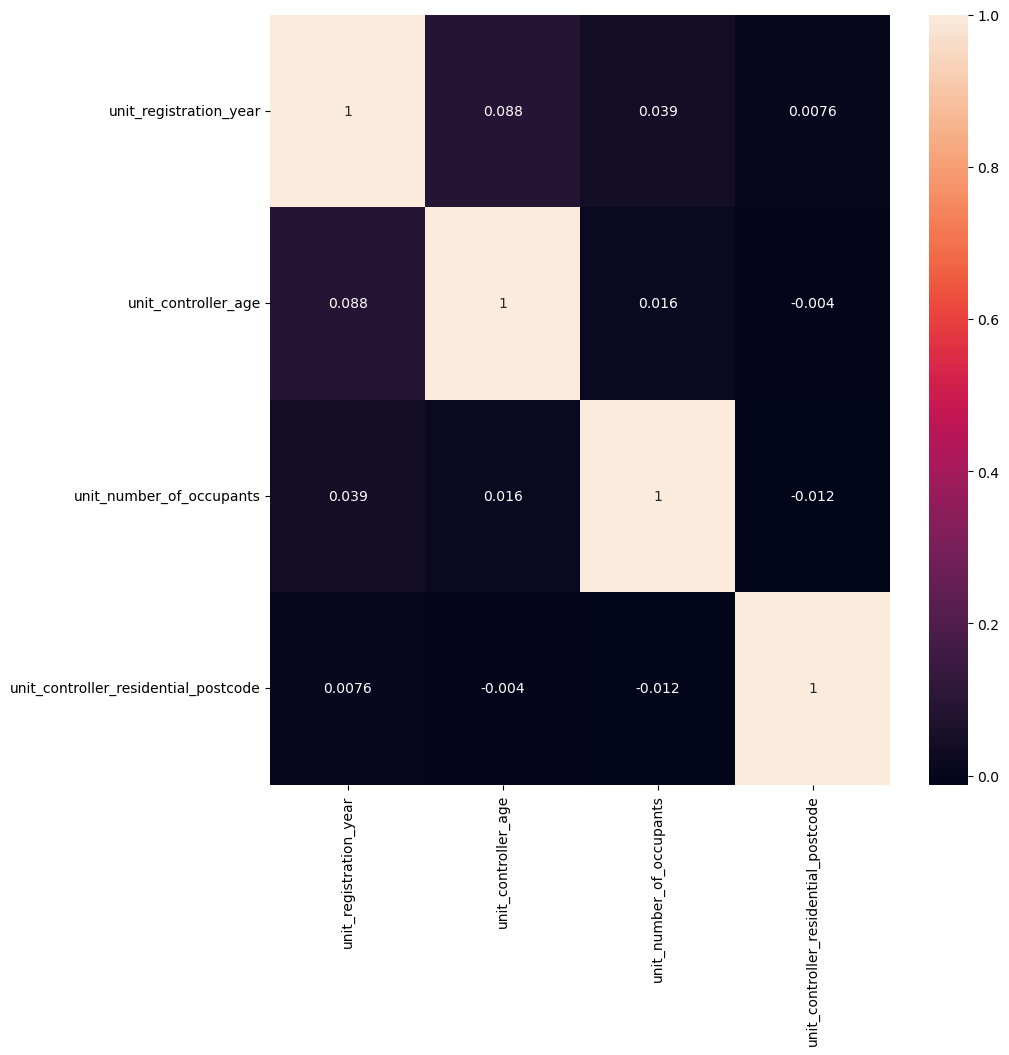

In [100]:
# create subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# create correlation heatmap in seaborn

corr = sns.heatmap(sub_uni_without_keys.corr(), annot = True, ax = ax)

## 5. Exploratory Analysis for merged_df

### 5.1 Make Subsets

In [103]:
subset_df_cra = df_cra[['REPORT_ID','crash_stats_area', 'crash_suburb', 'crash_postcode', 'total_units', 'total_casualties', 'total_fatalities', 'total_serious_injuries', 'total_minor_injuries', 'crash_month', 'crash_day', 'crash_time', 'area_speed', 'moisture_conditions', 'weather_conditions', 'crash_time_of_day', 'unit_responsible', 'dui_involved', 'drugs_involved', 'accloc_x', 'accloc_y']]

In [104]:
subset_df_cra_dt = df_cra[['REPORT_ID','crash_stats_area', 'crash_suburb', 'crash_postcode', 'total_units', 'total_casualties', 'total_fatalities', 'total_serious_injuries', 'total_minor_injuries', 'crash_month', 'crash_day', 'crash_time', 'area_speed', 'moisture_conditions', 'weather_conditions', 'crash_time_of_day', 'unit_responsible', 'dui_involved', 'drugs_involved', 'accloc_x', 'accloc_y', 'crash_date_time']]

In [105]:
subset_df_uni = df_uni_sub[['REPORT_ID', 'UNIT_NUMBER', 'unit_type', 'unit_registration_year', 'unit_controller_sex', 'unit_controller_age', 'unit_controller_licence_type', 'unit_number_of_occupants']]

### 5.2 Merge the Subsets

In [107]:
# rename UNIT_NUMBER to unit_responsible in subset_df_uni
subset_df_uni = subset_df_uni.rename(columns={'UNIT_NUMBER': 'unit_responsible'})

# merge the dataframes
merged_df = pd.merge(subset_df_cra, subset_df_uni, on=['REPORT_ID', 'unit_responsible'], how='left')

In [108]:
# merge the dataframe including date/time column

merged_df_dt = pd.merge(subset_df_cra_dt, subset_df_uni, on=['REPORT_ID', 'unit_responsible'], how='left')

In [109]:
merged_df.head()

,REPORT_ID,crash_stats_area,crash_suburb,crash_postcode,total_units,total_casualties,total_fatalities,total_serious_injuries,total_minor_injuries,crash_month,...,dui_involved,drugs_involved,accloc_x,accloc_y,unit_type,unit_registration_year,unit_controller_sex,unit_controller_age,unit_controller_licence_type,unit_number_of_occupants
0,2019-1-16/08/2024,2 Metropolitan,Hampstead Gardens,5086,2,0,0,0,0,June,...,N,N,1331810.03,1676603.26,Station Wagon,1998.0,Female,85.0,Full,1.0
1,2019-2-16/08/2024,2 Metropolitan,Dry Creek,5094,2,0,0,0,0,January,...,N,N,1328376.20,1682942.63,Motor Cars - Sedan,2002.0,Female,31.0,Full,1.0
2,2019-3-16/08/2024,2 Metropolitan,Mile End,5031,2,1,0,0,1,January,...,N,N,1325819.68,1670994.26,Motor Vehicle - Type Unknown,1937.0,Unknown,33.0,Unknown,1.0
3,2019-4-16/08/2024,2 Metropolitan,Paralowie,5108,2,1,0,1,0,January,...,N,N,1328320.60,1690237.08,Motor Cycle,2015.0,Male,21.0,Learners,1.0
4,2019-5-16/08/2024,2 Metropolitan,Mount Barker,5251,2,0,0,0,0,January,...,N,N,1353279.99,1655645.15,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# exclude unndeeded columns
df_merged = merged_df.drop(['REPORT_ID', 'crash_stats_area', 'crash_suburb', 'crash_postcode', 'crash_month', 'crash_day', 'crash_time', 'moisture_conditions', 'weather_conditions', 'crash_time_of_day', 'unit_responsible', 'dui_involved', 'drugs_involved', 'unit_type', 'unit_controller_sex', 'unit_controller_licence_type'], axis=1)

# calculate the correlation matrix
df_merged.corr()

,total_units,total_casualties,total_fatalities,total_serious_injuries,total_minor_injuries,area_speed,accloc_x,accloc_y,unit_registration_year,unit_controller_age,unit_number_of_occupants
total_units,1.000000,0.034806,0.002026,-0.034151,0.052754,-0.070050,0.029023,-0.069001,0.014227,-0.003169,-0.010654
total_casualties,0.034806,1.000000,0.153210,0.387091,0.900051,0.105103,-0.003371,0.021361,0.031009,0.038030,0.046555
total_fatalities,0.002026,0.153210,1.000000,0.086697,-0.021043,0.094632,-0.010640,0.029002,0.004285,0.021778,0.003380
total_serious_injuries,-0.034151,0.387091,0.086697,1.000000,-0.029332,0.114040,-0.008459,0.035353,0.002233,0.027913,0.019086
total_minor_injuries,0.052754,0.900051,-0.021043,-0.029332,1.000000,0.050548,0.001633,0.003453,0.032328,0.026551,0.042285
area_speed,-0.070050,0.105103,0.094632,0.114040,0.050548,1.000000,-0.006959,0.118426,0.013549,-0.037376,0.000552
accloc_x,0.029023,-0.003371,-0.010640,-0.008459,0.001633,-0.006959,1.000000,-0.510774,-0.003237,-0.006697,-0.011424
accloc_y,-0.069001,0.021361,0.029002,0.035353,0.003453,0.118426,-0.510774,1.000000,-0.005248,0.015719,0.006146
unit_registration_year,0.014227,0.031009,0.004285,0.002233,0.032328,0.013549,-0.003237,-0.005248,1.000000,0.087362,0.046284
unit_controller_age,-0.003169,0.038030,0.021778,0.027913,0.026551,-0.037376,-0.006697,0.015719,0.087362,1.000000,0.007109


### 5.3 Correlation Matrix for df_merged

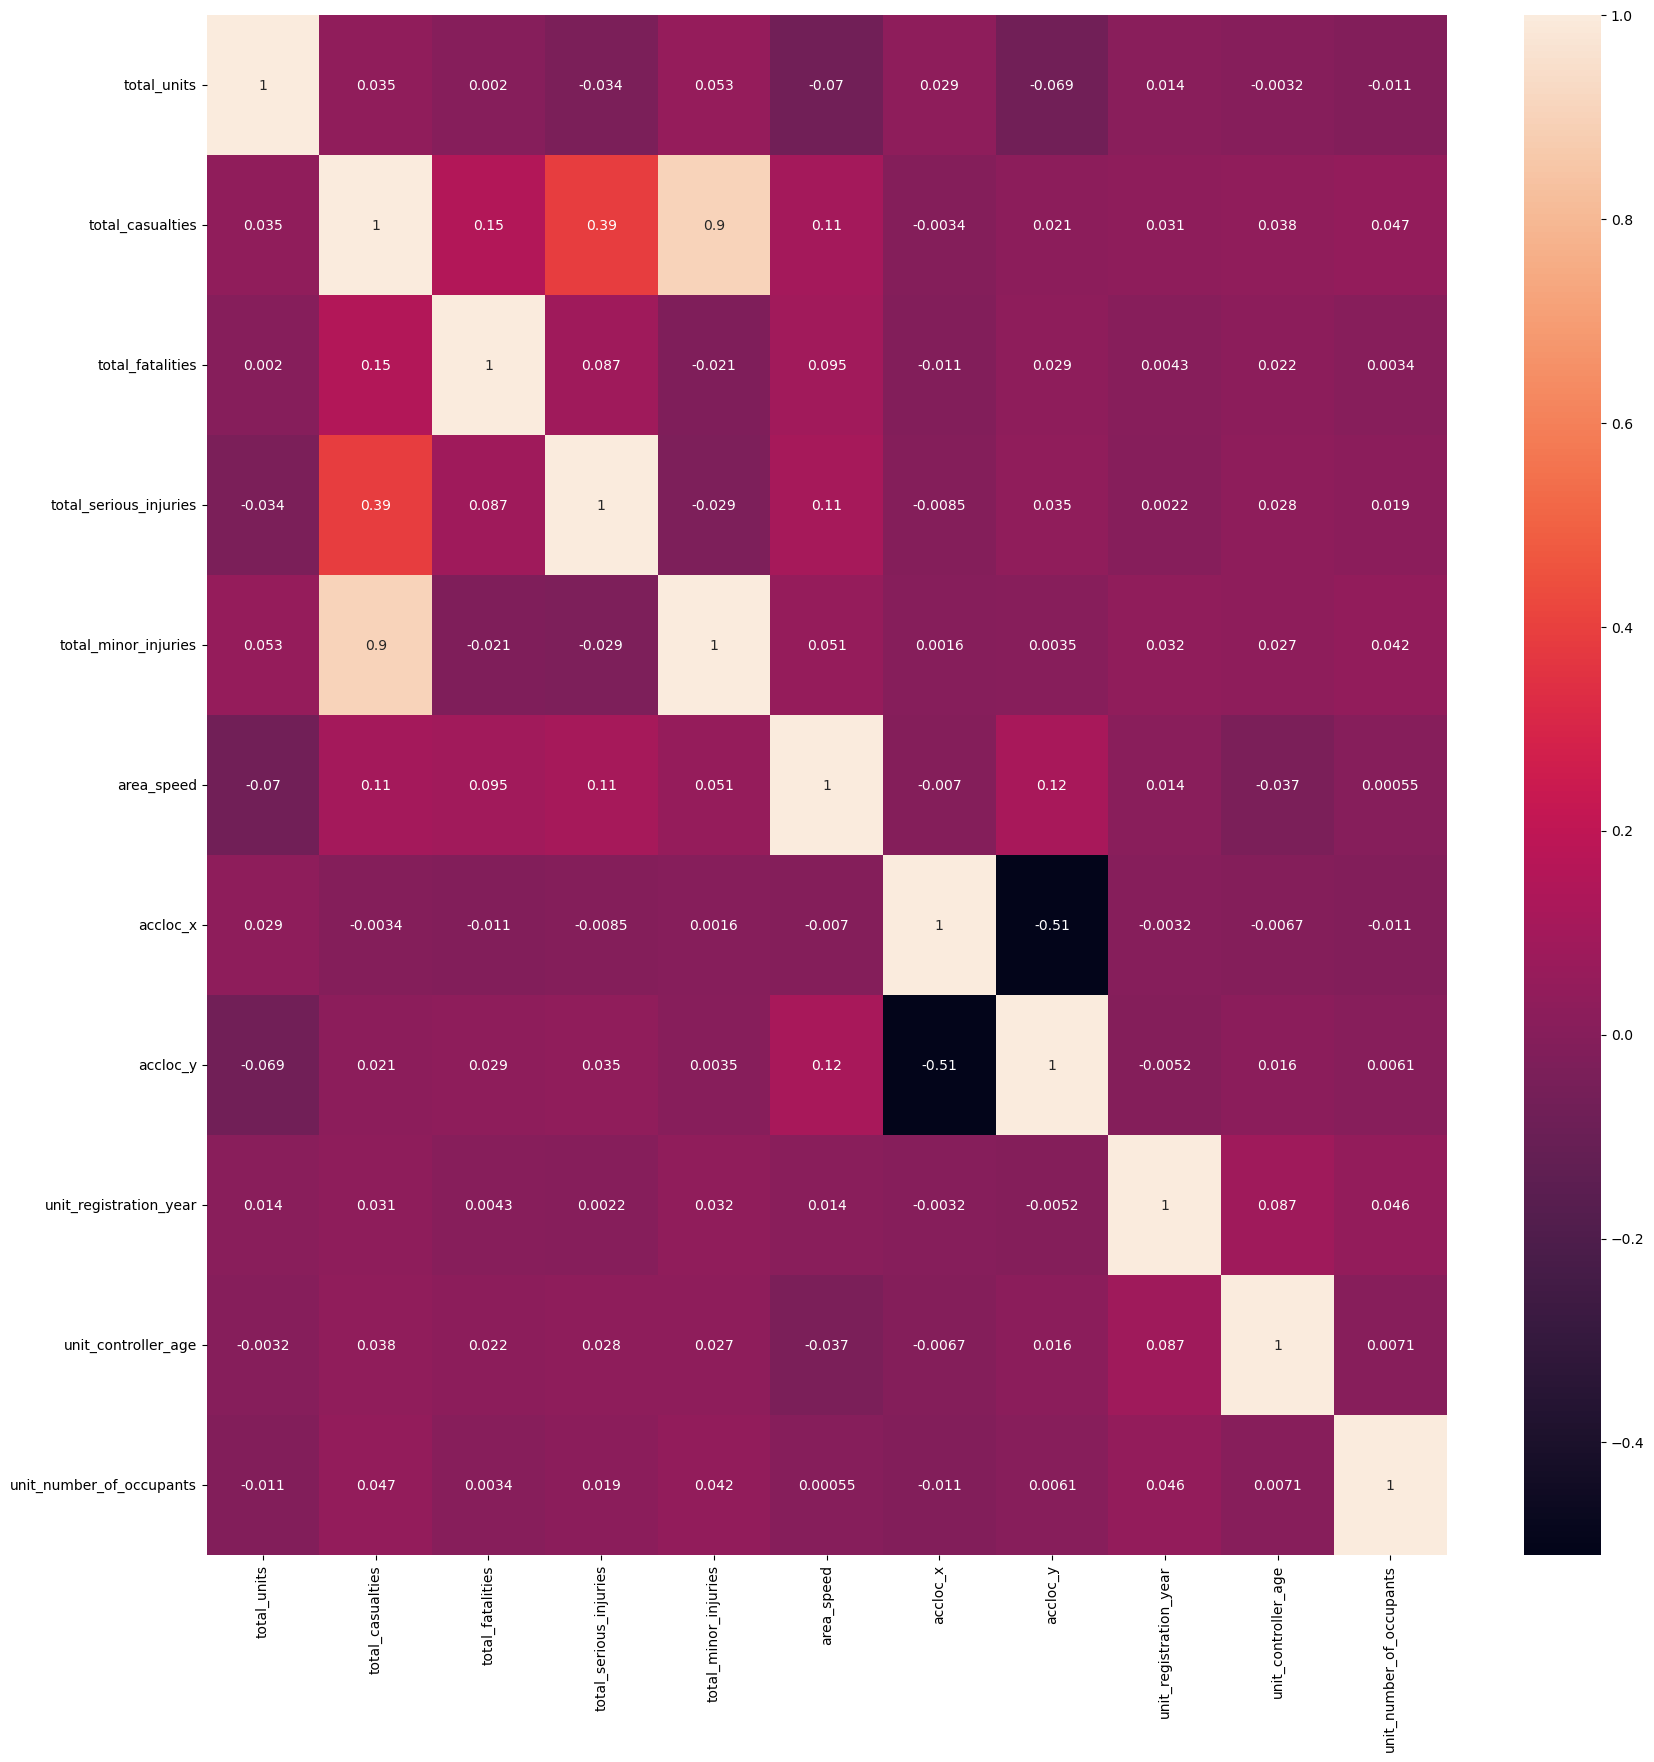

In [112]:
# create subplot with matplotlib

f,ax = plt.subplots(figsize=(20,20))

# create correlation heatmap in seaborn

corr = sns.heatmap(df_merged.corr(), annot = True, ax = ax)

## 7. Scatterplots

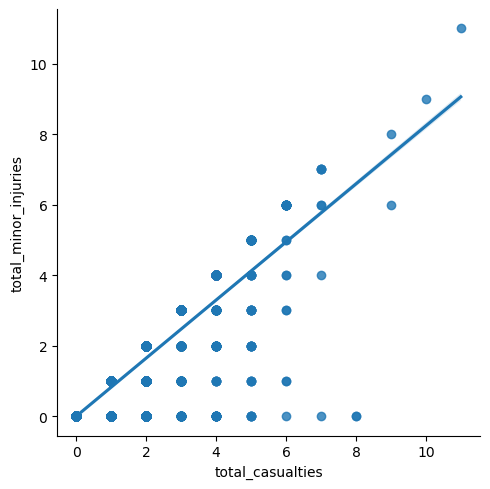

In [115]:
# scatterplot for the 'total_casualties' and 'total_minor_injuries'

sns.lmplot(x = 'total_casualties', y = 'total_minor_injuries', data = df_merged)

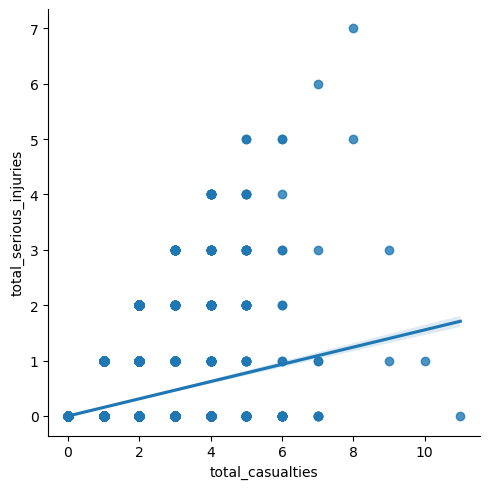

In [116]:
# scatterplot for the 'total_casualties' and 'total_serious_injuries'

sns.lmplot(x = 'total_casualties', y = 'total_serious_injuries', data = df_merged)

## 8. Pair Plot

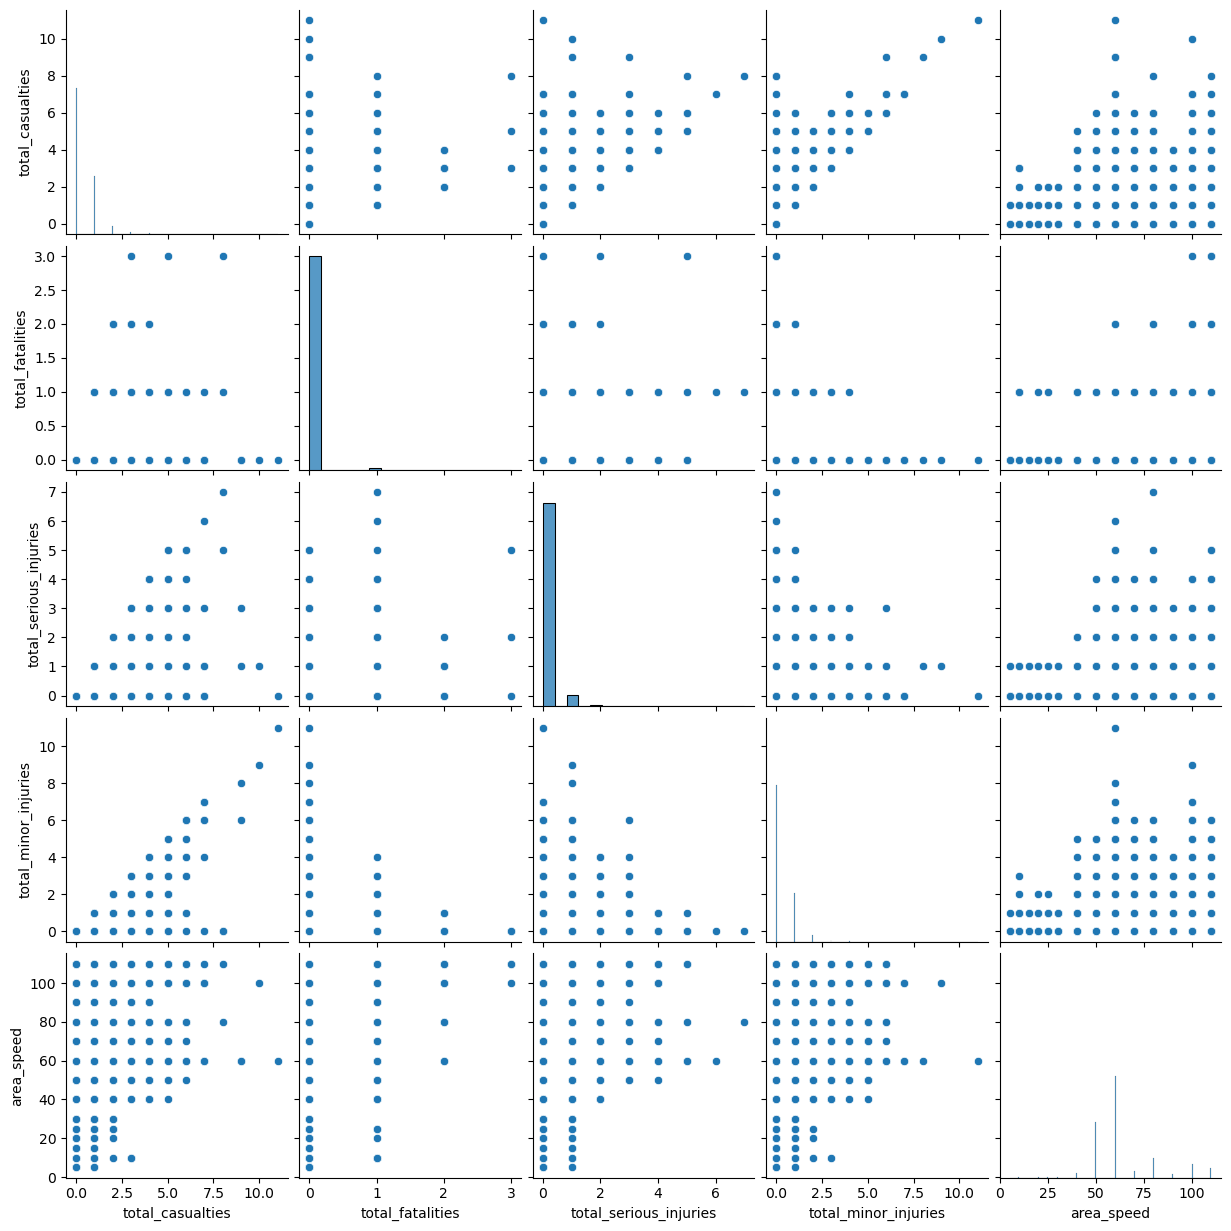

In [119]:
# keep only useful variables

sub = df_merged[['total_casualties', 'total_fatalities', 'total_serious_injuries', 'total_minor_injuries', 'area_speed']]

# create pair plot 

pair_plot = sns.pairplot(sub)

## 9. Categorical Plot

<Axes: xlabel='unit_controller_age', ylabel='Count'>

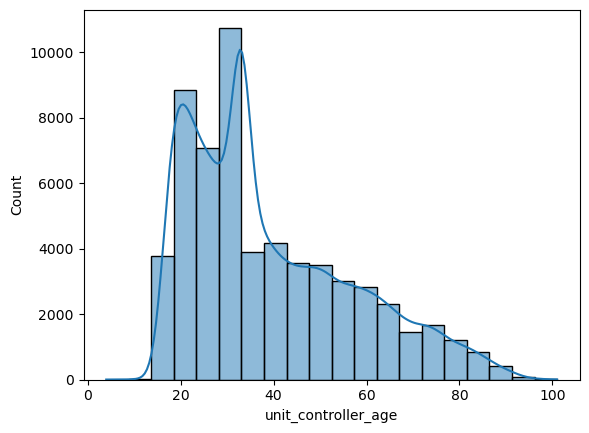

In [122]:
# use histogram to visualize the distribution of the variable

sns.histplot(df_merged['unit_controller_age'], bins = 20, kde = True)

In [123]:
# create categories for the unit_controller_age variable

df_merged.loc[df_merged['unit_controller_age'] < 20, 'age_category'] = 'Youth driver'
df_merged.loc[(df_merged['unit_controller_age'] >= 20) & (df_merged['unit_controller_age'] < 40), 'age_category'] = 'Young driver'
df_merged.loc[(df_merged['unit_controller_age'] >= 40) & (df_merged['unit_controller_age'] < 70), 'age_category'] = 'Middle-aged driver'
df_merged.loc[df_merged['unit_controller_age'] >= 70, 'age_category'] = 'Old driver'

# check value counts for the new categories
df_merged['age_category'].value_counts(dropna = False)

age_category
Young driver          30501
Middle-aged driver    18331
Youth driver           5668
Old driver             4876
NaN                    3693
Name: count, dtype: int64

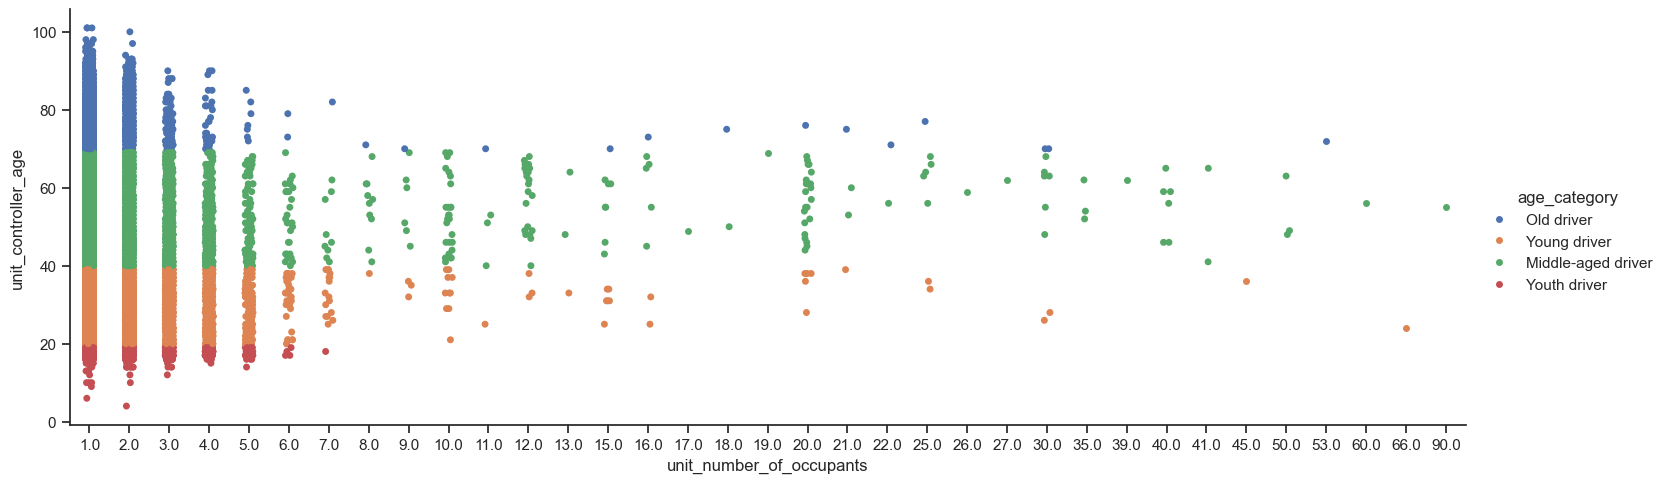

In [124]:
# create categorical plot using the driver_age categories

sns.set(style="ticks")
c_plot = sns.catplot(x="unit_number_of_occupants", y="unit_controller_age", hue="age_category", data=df_merged, aspect=3)

## 10. Export Dataframe

In [129]:
# export merged dataframe

merged_df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'merged_df.csv'))

In [130]:
# export merged dataframe

merged_df_dt.to_csv(os.path.join(path, '02 Data','Prepared Data', 'merged_df_dt.csv'))